# Ridge Regression

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn import linear_model
import scipy.stats as stats
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import model_selection

Rozważmy następujący zbiór punktów:

In [89]:
true_fun = lambda X: np.cos(1.5 * np.pi * X)
n_samples=20
x = np.sort(np.random.rand(n_samples))
y = true_fun(x) + np.random.randn(n_samples) * 0.1
x=np.vstack(x)

# Przykład 
Proszę wykonać regresję (Ridge Regression) na powyższym zbiorze danych 

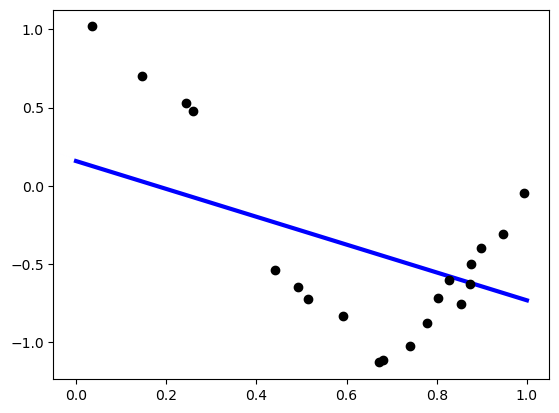

In [90]:
clf = Ridge(alpha=1.0)
clf.fit(x, y) 

x_plot = np.vstack(np.linspace(0, 1, 20))
plt.plot(x_plot, clf.predict(x_plot), color='blue',linewidth=3)
plt.plot(x, y, 'ok')
plt.show()

## Regresja liniowa

LR degree 2
LR degree 20


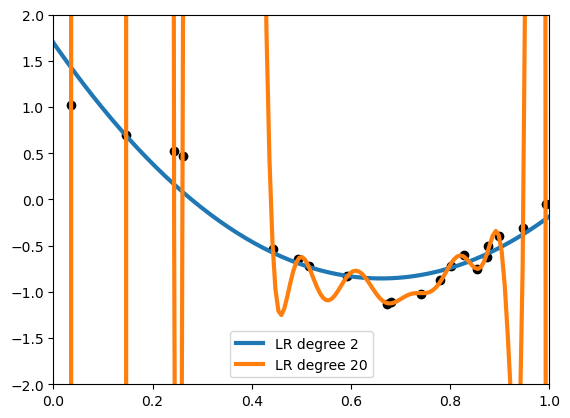

In [91]:
# prepare models
models = []
predicts = []
names=[]
models.append(('LR degree 2', make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression()) ))
models.append(('LR degree 20', make_pipeline(PolynomialFeatures(20), linear_model.LinearRegression()) ))

x_plot = np.vstack(np.linspace(-3, 3, 1000))
for name, model in models:
    print(name)
    model.fit(x, y)
    predicts.append(model.predict(x_plot))
    names.append(name)
    
x_plot = np.vstack(np.linspace(-3, 3, 1000))
plt.plot(x, y, 'ok')
for i in range(len(models)):
    #print(i)
    plt.plot(x_plot, predicts[i],linewidth=3,label=names[i])
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
plt.legend()    
plt.show()    

# Zadanie 1
Proszę wykonać 
* regresję dla wielomianów o stopniu **20**
* regresję (Ridge Regression) dla wielomianów o stopniu **20** oraz
   * alpha = 1 
   * alpha = 10 000 
   * alpha = 0.0001


LR degree 20
Ridge degree 20, alpha = 1
Ridge degree 20, alpha = 10000
Ridge degree 20, alpha = 0.0001


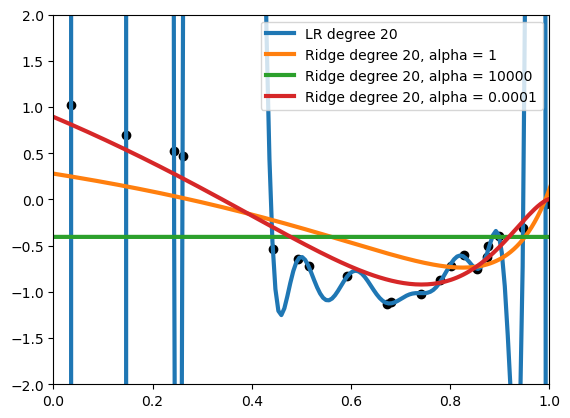

In [92]:
models = []
predicts = []
names=[]
models.append(('LR degree 20', make_pipeline(PolynomialFeatures(20), linear_model.LinearRegression()) ))
models.append(("Ridge degree 20, alpha = 1", make_pipeline(PolynomialFeatures(20), Ridge(alpha=1.0) )))
models.append(("Ridge degree 20, alpha = 10000", make_pipeline(PolynomialFeatures(20), Ridge(alpha=10000) )))
models.append(("Ridge degree 20, alpha = 0.0001", make_pipeline(PolynomialFeatures(20), Ridge(alpha=0.1) )))

x_plot = np.vstack(np.linspace(-3, 3, 1000))
for name, model in models:
    print(name)
    model.fit(x, y)
    predicts.append(model.predict(x_plot))
    names.append(name)
    
x_plot = np.vstack(np.linspace(-3, 3, 1000))
plt.plot(x, y, 'ok')
for i in range(len(models)):
    #print(i)
    plt.plot(x_plot, predicts[i],linewidth=3,label=names[i])
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
plt.legend()    
plt.show()    

# Zadanie 1
Dobierz optymalny stopień wielomianu oraz parametr alpha za pomocą komendy **GridSearchCV**. 

In [93]:
from sklearn.model_selection import GridSearchCV, KFold

kfold = KFold(n_splits=10, random_state=123, shuffle=True)

grid = GridSearchCV(
    estimator=make_pipeline(PolynomialFeatures(), Ridge()),
    param_grid={
        'polynomialfeatures__degree': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], 
        'ridge__alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]
    },
    cv=kfold,
    refit=False
)

grid.fit(x, y)
grid.best_params_

{'polynomialfeatures__degree': 5, 'ridge__alpha': 0.0001}

# Zadanie 2
Dobierz optymalny stopień wielomianu oraz parametr <tt>alpha</tt> za pomocą metody <tt>GridSearchCV</tt> dla danych reklamowych, obejmującym sprzedaż produktów i ich budżet reklamowy w trzech różnych mediach telewizyjnych, radiu, gazetach.

*  policz r_square score.

In [94]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
import pandas as pd

df_adv = pd.read_csv('https://raw.githubusercontent.com/przem85/bootcamp/master/statistics/Advertising.csv', index_col=0)
X = df_adv[['TV', 'radio','newspaper']]
y = df_adv['sales']

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=123)

lasso_model = make_pipeline(PolynomialFeatures(degree=20), Ridge(max_iter=10000000))

param_grid = {
    'polynomialfeatures__degree': [2, 3, 4, 5, 6, 7, 8], 
    'ridge__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]
}

grid_search = GridSearchCV(lasso_model, param_grid, cv=5)
grid_search.fit(X_test, y_test)

best_degree = grid_search.best_params_['polynomialfeatures__degree']
best_alpha = grid_search.best_params_['ridge__alpha']

print(f"Optimal Degree: {best_degree}")
print(f"Optimal Alpha: {best_alpha}")

best_model = make_pipeline(PolynomialFeatures(degree=best_degree), Ridge(alpha=best_alpha, max_iter=10000000))
best_model.fit(X_train, y_train)
best_predict = best_model.predict(X_test)

r2 = r2_score(y_test, best_model.predict(X_test))
print(f"R^2 Score: {r2}")

/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.94658e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.31747e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.61635e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.40316e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/opt/homebrew/anaconda3/lib/python3.

Optimal Degree: 3
Optimal Alpha: 10
R^2 Score: 0.9932092446291289


/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
